In [10]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Limitting the memory growth of GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimetnal.set_memory_growth(gpu, True)

In [11]:
import cv2 as cv
import imghdr

## Filtering Data

In [6]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
# To enter inside the happy folder and get every image
# os.listdir(os.path.join(data_dir, 'happy'))

In [8]:
# To filter the images:
# 1. First delete all the imgages which of are of size <10KB
# 2. Delete all svg files

In [9]:
# Removing dodgy images:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv.imread(image_path) # Checks if we can load the image into opencv
            tip = imghdr.what(image_path)# Gets the extensions of image, and below we remove all who are not in image_exts
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

## Loading Data

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data') # Building our data pipeline
data_iterator = data.as_numpy_iterator() # Allowing to loop through the data pipeline

Found 205 files belonging to 2 classes.


In [26]:
# Get another batch from iterator
batch = data_iterator.next() # Accessing the data pipeline
# batch[0] gives all images as arrys and batch[1] gives the labels corresponding to every image i.e. 0 for happy and 1 for sad

In [29]:
batch[0].shape # default batch size is 32 i.e. every batch will contain 32 images

(32, 256, 256, 3)

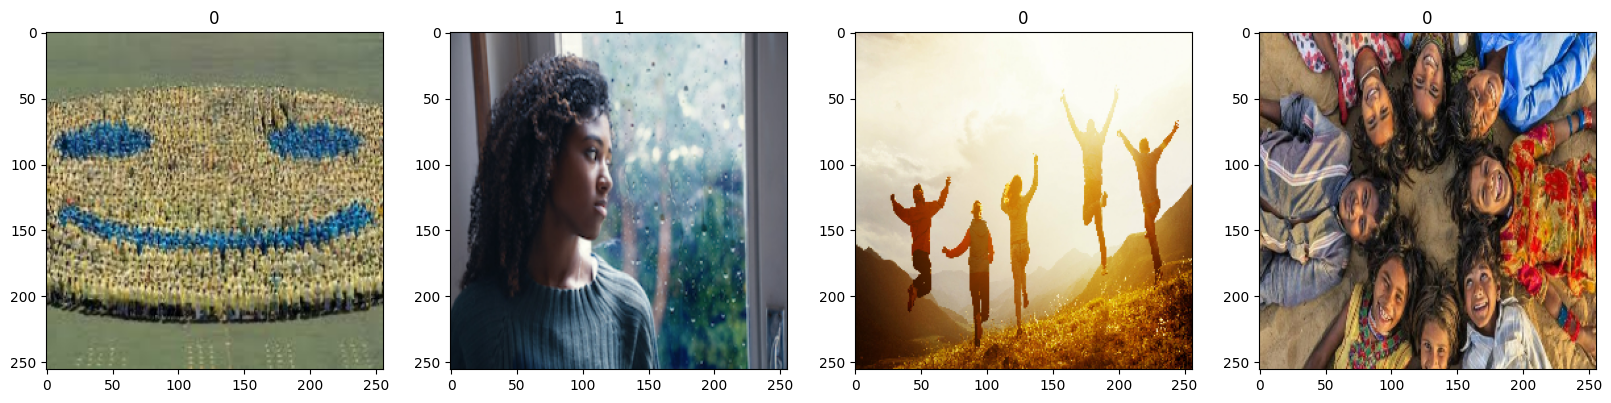

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])